In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')

### StandardScaler on [ Time & Amount ]

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df['Time_Scaled'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Scaled,Amount_Scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-1.996583,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-1.996583,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-1.996562,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-1.996562,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-1.996541,-0.073403


In [5]:
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_Scaled,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


### Feature Selection

In [6]:
X = df.drop(['Class'],axis=1)
y = df['Class']

## Without using SMOTE

### Split the data into test and train sets

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)


 X_train dataset:  (199364, 30)
 y_train dataset:  (199364,)
 X_test dataset:  (85443, 30)
 y_test dataset:  (85443,)


### Create a LogisticRegression Model

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train.ravel()) # .ravel() method in NumPy is used to flatten an array into a 1D array.

predictions = lr.predict(X_test)


### Classification_report & ROC-AUC Score

### Note:
### Why ROC-AUC is Important for Fraud Detection?
- **Better than accuracy**: Since fraud cases are rare, accuracy can be misleading.  
- **Helps select the best threshold**: It shows the trade-off between **False Positives** & **False Negatives**.  

#### **AUC Score Interpretation:**
- **0.5** → Random guessing  
- **0.7 - 0.8** → Fair  
- **0.8 - 0.9** → Good  
- **>0.9** → Excellent  


In [9]:
from sklearn.metrics import classification_report,roc_auc_score,accuracy_score

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.8094534662486266


### Notes:
- This is a highly imbalanced dataset, which is why we got a higher accuracy of **1.00** here.  
  **Low Bias + High Variance = Overfitting** occurs.  
- To solve this problem, we need to use **SMOTE** (Synthetic Minority Oversampling Technique).  
- **SMOTE Definition**: SMOTE is an oversampling technique that generates synthetic samples for the minority class to balance the dataset and improve model performance.


## Using SMOTE

In [10]:
from imblearn.over_sampling import SMOTE  

print(f"Before Oversampling: Class 1 = {sum(y_train == 1)}, Class 0 = {sum(y_train == 0)}")  

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

print(f"After Oversampling: Class 1 = {sum(y_train == 1)}, Class 0 = {sum(y_train == 0)}")  



Before Oversampling: Class 1 = 345, Class 0 = 199019
After Oversampling: Class 1 = 227339, Class 0 = 227565


### LogisticRegression

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train.ravel())

predictions = lr.predict(X_test)

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

ROC-AUC Score: 0.9489565461986004


### KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train.ravel())

predictions = knn.predict(X_test)

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9988986784140969


### Note:
#### **Distance-Based Models Like KNN May Not Work Well**
- **Issue:** KNN relies on distance-based classification, which can struggle with **high-dimensional data** (like PCA-transformed features).  
- **Solution:** Consider using **Logistic Regression, Random Forest, or XGBoost** instead for better performance.

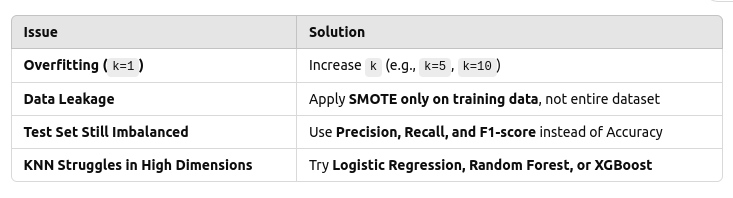



### Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9998942731277534


### XGBoost

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

predictions = xgb.predict(X_test)

print(classification_report(y_test, predictions))
print("ROC-AUC Score:", roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC-AUC Score: 0.9997444933920705


### Final Report

In [15]:

lr = LogisticRegression(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb =XGBClassifier(random_state=42)

models = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'XGBoost': xgb
}

def print_metrics(model, model_name):
    predictions = model.predict(X_test)  
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Class 1): {report['1']['precision']:.4f}")
    print(f"Recall (Class 1): {report['1']['recall']:.4f}")
    print(f"F1-Score (Class 1): {report['1']['f1-score']:.4f}\n")

for model_name, model in models.items():
    model.fit(X_train, y_train) 
    print_metrics(model, model_name)


Model: Logistic Regression
Accuracy: 0.9489
Precision (Class 1): 0.9744
Recall (Class 1): 0.9223
F1-Score (Class 1): 0.9476

Model: Random Forest
Accuracy: 0.9999
Precision (Class 1): 0.9998
Recall (Class 1): 1.0000
F1-Score (Class 1): 0.9999

Model: XGBoost
Accuracy: 0.9997
Precision (Class 1): 0.9995
Recall (Class 1): 1.0000
F1-Score (Class 1): 0.9997

